In [8]:
library(cpbnplot)
library(DESeq2)
library(org.Hs.eg.db)
library(parallel)

- RNA-Seq data of specimens from bladder cancer deposited in Gene Expression Omnibus database (GSE133624) was used for demonstrative purpose.
- Chen X, Li A, Sun BF, Yang Y, Han YN, Yuan X, Chen RX, Wei WS, Liu Y, Gao CC, Chen YS, Zhang M, Ma XD, Liu ZW, Luo JH, Lyu C, Wang HL, Ma J, Zhao YL, Zhou FJ, Huang Y, Xie D, Yang YG. 5-methylcytosine promotes pathogenesis of bladder cancer through stabilizing mRNAs. Nat Cell Biol. 2019 Aug;21(8):978-990. doi: 10.1038/s41556-019-0361-y. Epub 2019 Jul 29. PMID: 31358969.

In [9]:
counts = read.table("GSE133624_reads-count-all-sample.txt", header=1, row.names=1)
meta = data.frame(sapply(colnames(counts), function (x) substring(x,1,1)))
colnames(meta) = c("Condition")

### Identify DEGs using DESeq2

In [10]:
dds <- DESeqDataSetFromMatrix(countData = counts,
                              colData = meta,
                              design= ~ Condition)
filt <- rowSums(counts(dds) < 10) > dim(meta)[1]*0.9
dds <- dds[!filt,]
dds = DESeq(dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
"some variables in design formula are characters, converting to factors"
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 1352 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [11]:
res = results(dds, pAdjustMethod = "bonferroni")
sig = subset(res, padj<0.05)
vsted = assay(vst(dds, blind=T))

In [12]:
cand.entrez = clusterProfiler::bitr(rownames(sig), fromType="ENSEMBL", toType="ENTREZID", OrgDb=org.Hs.eg.db)$ENTREZID
pway = ReactomePA::enrichPathway(gene = cand.entrez)
pway = enrichplot::pairwise_termsim(pway)
## Define including samples
incSample = rownames(subset(meta, Condition=="T"))

'select()' returned 1:many mapping between keys and columns

Warning message in clusterProfiler::bitr(rownames(sig), fromType = "ENSEMBL", toType = "ENTREZID", :
"13.46% of input gene IDs are fail to map..."


In [13]:
options(warn=-1, repr.plot.width=10, repr.plot.height=10)

### Plotting using cpbnplot

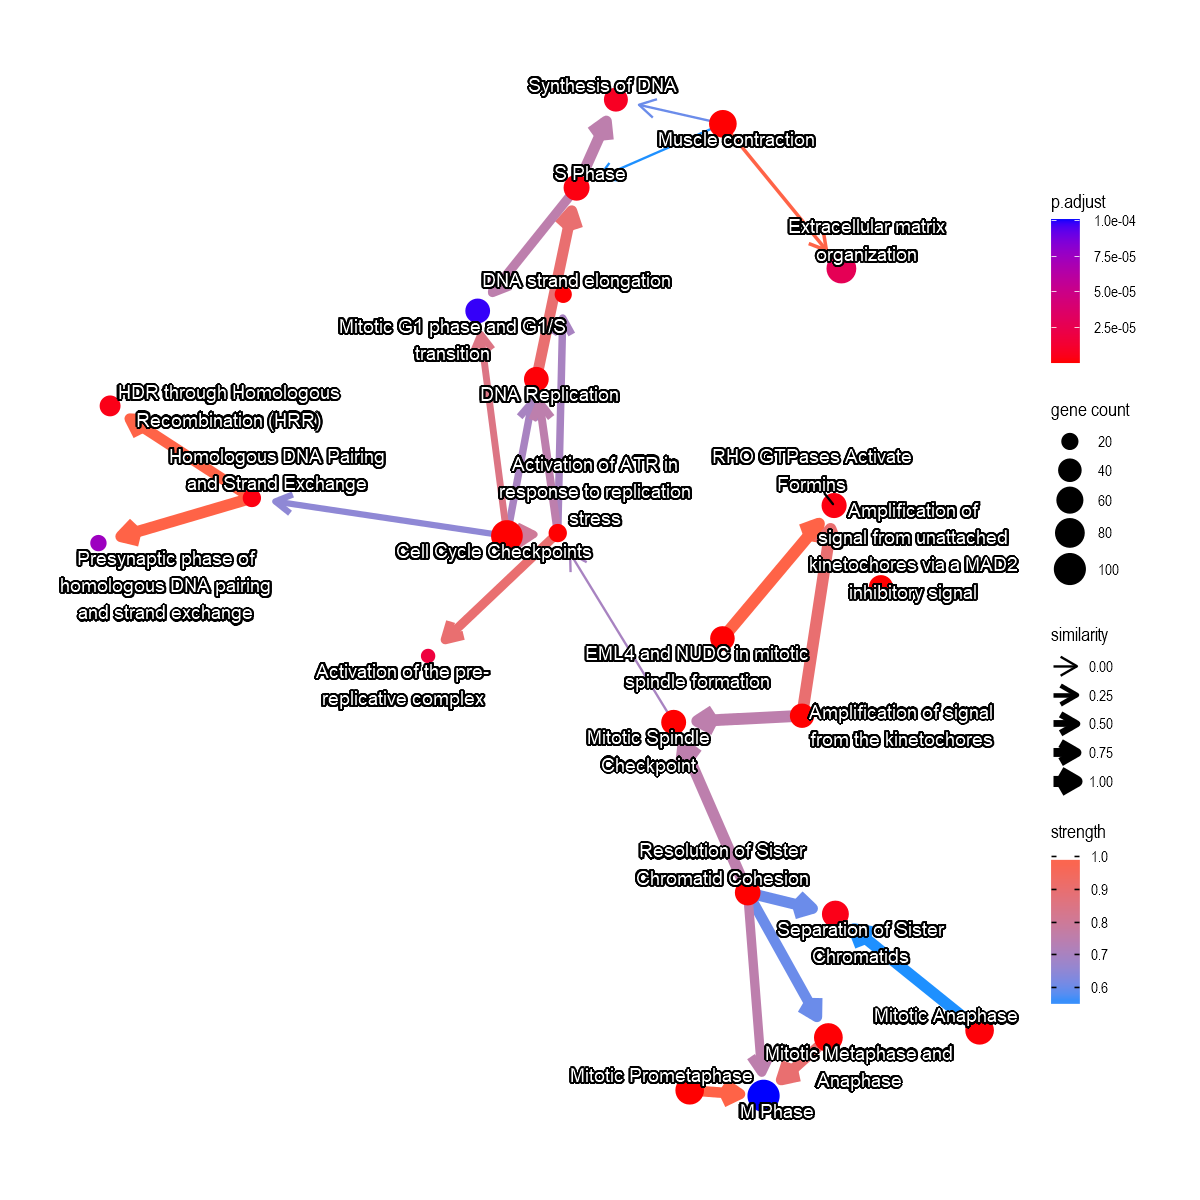

In [18]:
suppressMessages(bnpathplot(pway, vsted,
         expSample=incSample,
         algo="tabu", nCategory=25, shadowText=TRUE,
         qvalueCutOff=0.05, interactive=F, labelSize=4))

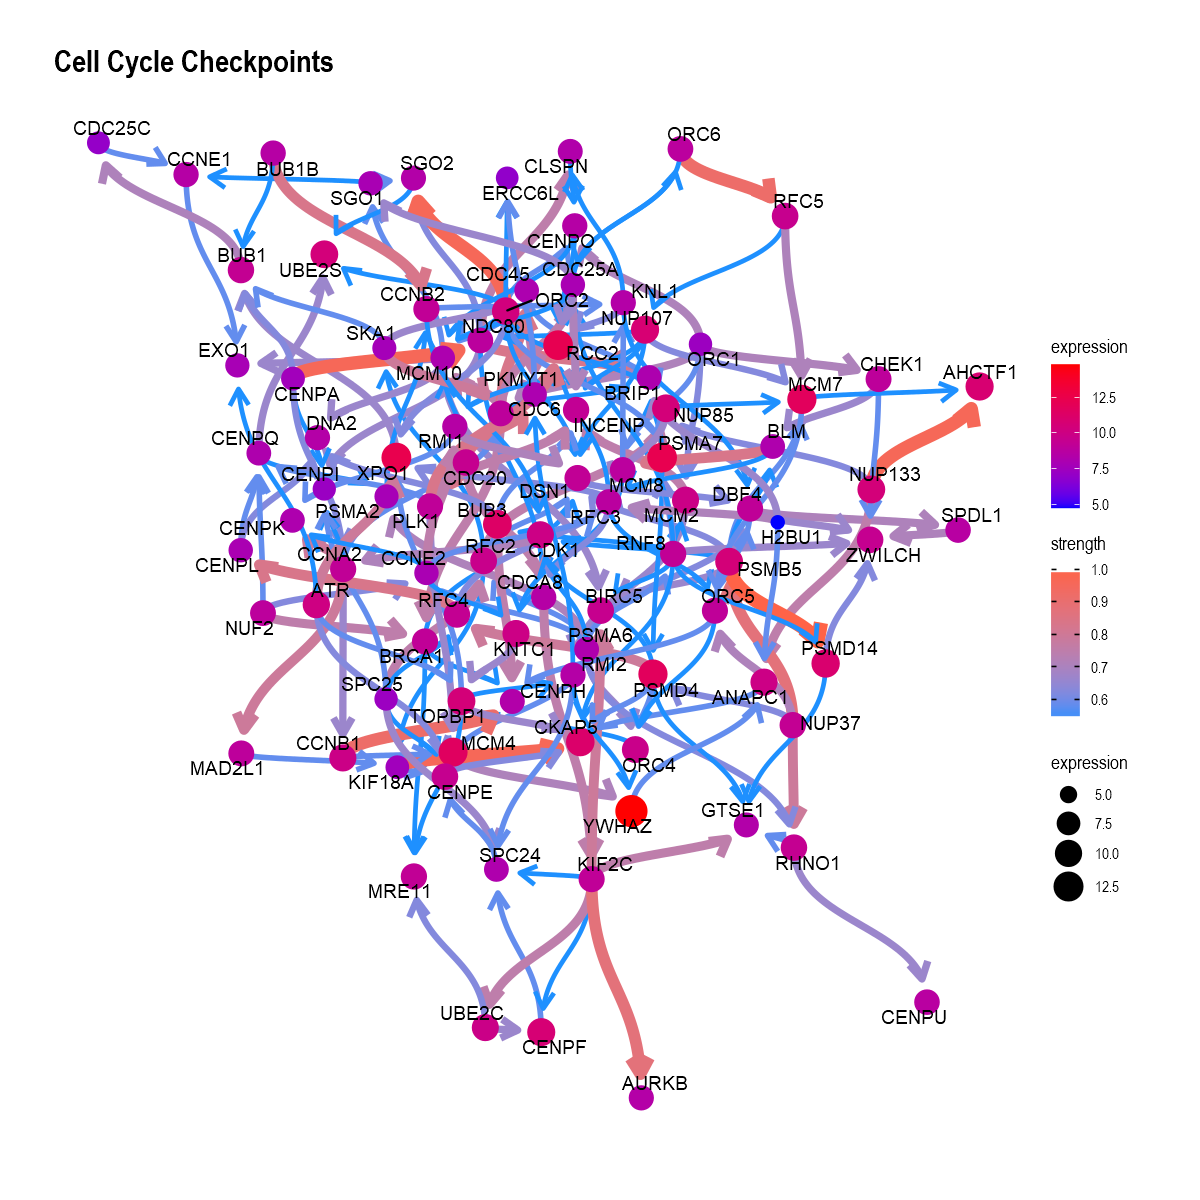

In [15]:
cl <- makeCluster(6)
suppressMessages(bngeneplot(pway, vsted,
                expSample=incSample,
         algo="hc", pathNum=1, cl=cl,
         interactive=F, labelSize=4))

In [16]:
# Interactive mode using bnviewer
# suppressMessages(bnpathplot(pway, vsted,
#          candidateRows=rownames(subset(meta, Condition=="T")),
#          algo="hc", nCategory=25,
#          qvalueCutOff=0.05, interactive=T))

In [17]:
sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 19042)

Matrix products: default

locale:
[1] LC_COLLATE=Japanese_Japan.932  LC_CTYPE=Japanese_Japan.932   
[3] LC_MONETARY=Japanese_Japan.932 LC_NUMERIC=C                  
[5] LC_TIME=Japanese_Japan.932    

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] org.Hs.eg.db_3.13.0         AnnotationDbi_1.54.1       
 [3] DESeq2_1.32.0               SummarizedExperiment_1.22.0
 [5] Biobase_2.52.0              MatrixGenerics_1.4.0       
 [7] matrixStats_0.59.0          GenomicRanges_1.44.0       
 [9] GenomeInfoDb_1.28.1         IRanges_2.26.0             
[11] S4Vectors_0.30.0            BiocGenerics_0.38.0        
[13] cpbnplot_0.99.0            

loaded via a namespace (and not attached):
  [1] uuid_0.1-4                    shadowtext_0.0.8             
  [3] backports_1.2.1    